In [1]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

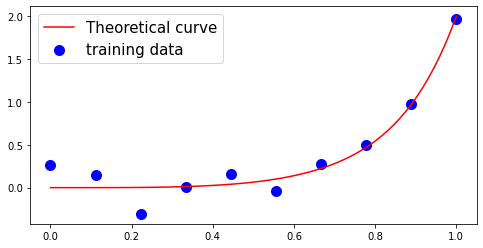

In [2]:
import numpy as np

from matplotlib import pyplot as plt

np.random.seed(10)

#função para gerar os dados
def function(x):
    #y = np.sin(2 * np.pi * x)
    #y = np.cos(2 * np.pi * x)
    y = x**4 + x**9
    return y



# training set
N_train = 10
sigma = 0.2
x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)



fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b",s=100, label="training data")



# test set
N_test = 10
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)



# Theoretical curves
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

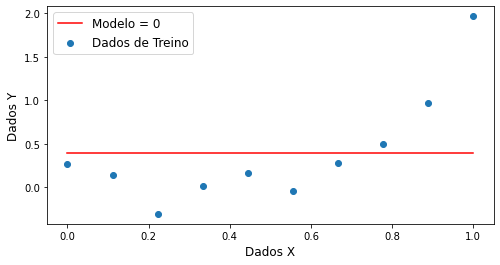

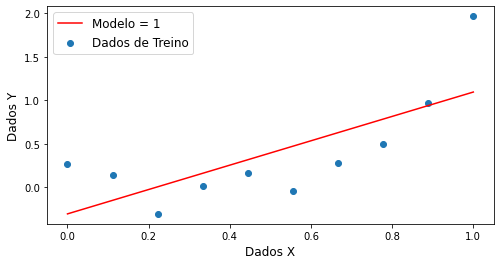

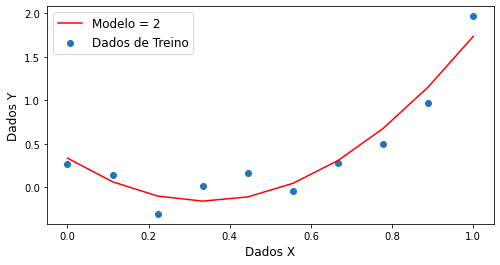

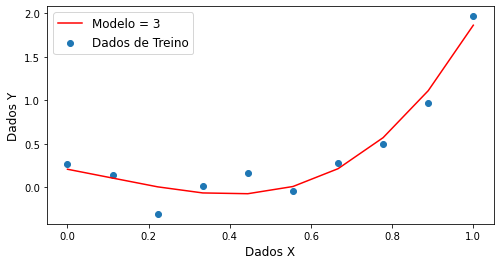

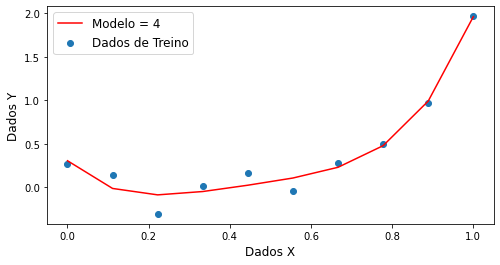

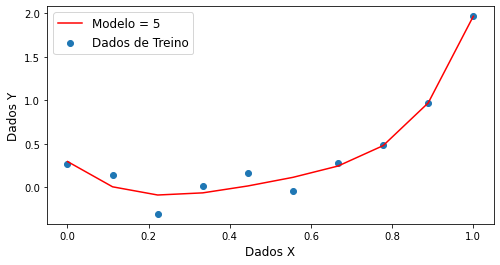

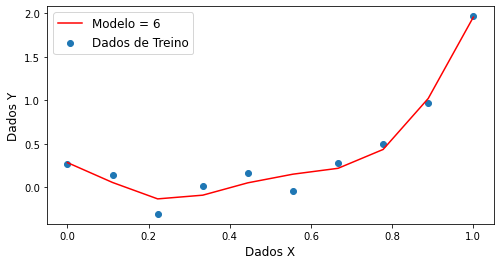

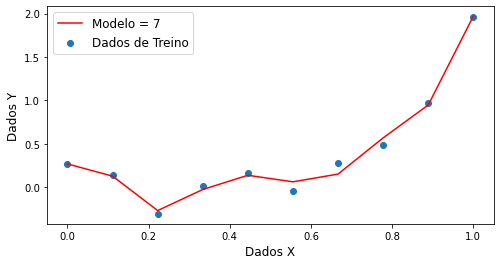

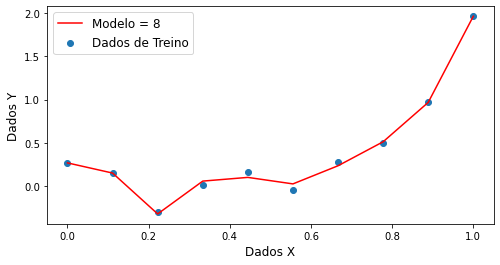

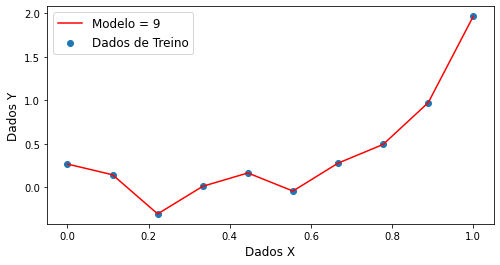

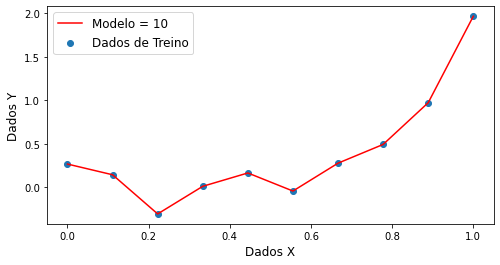

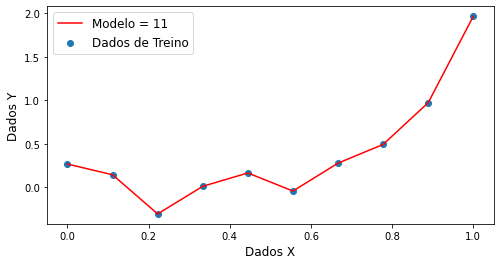

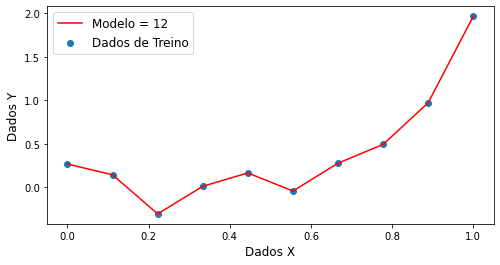

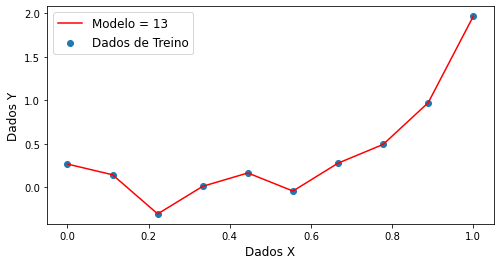

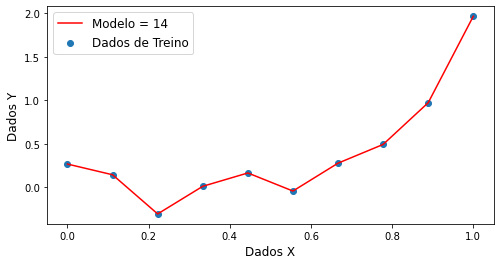

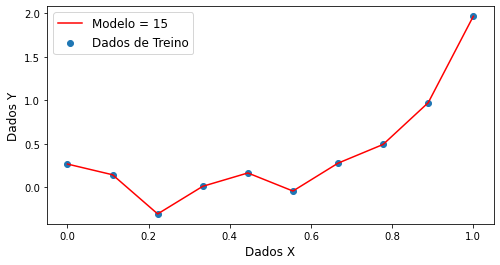

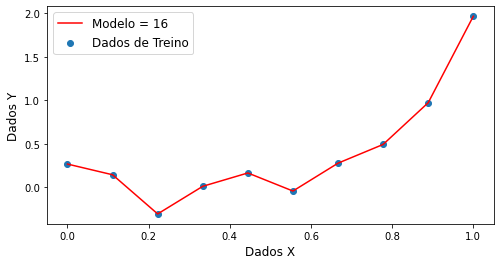

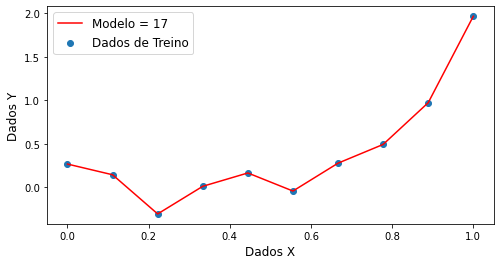

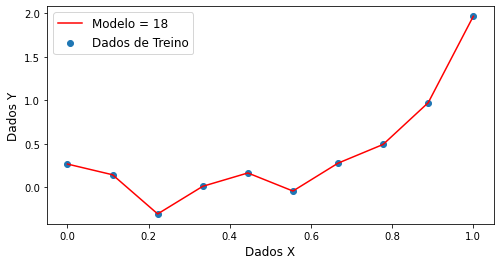

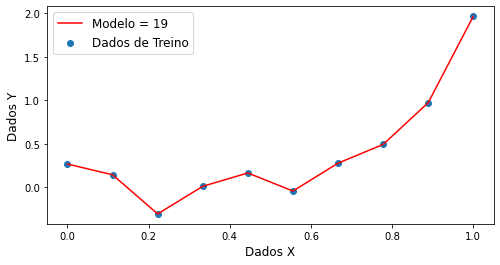

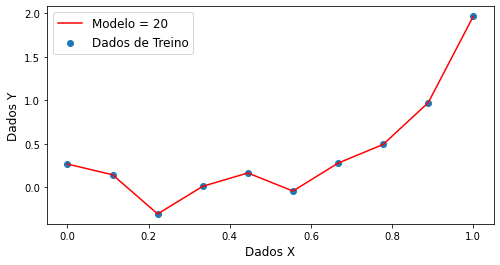

Grau Polinômio com menor erro =  3


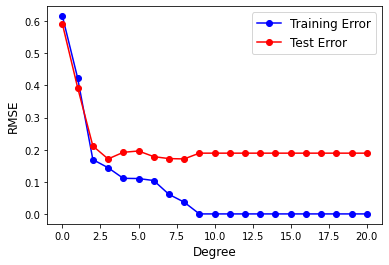

In [3]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

x_plot=np.linspace(0,1,N_train) 
x_plot=x_plot.reshape(len(x_plot), 1)

er_train = []
er_test = []
degree = []

for M in  np.arange(0, 21):
    poly = PolynomialFeatures(degree = M)
    X_train = poly.fit_transform(x_train)
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
   
    #X_plot = poly.fit_transform(x_plot)
    Y_pred = model.predict(X_train)
    X_test = poly.fit_transform(x_test)
    Y_pred_test = model.predict(X_test) 
    
    erro_train = rmse(Y_pred, y_train)
    er_train.append(erro_train)
    
    erro_test = rmse(Y_pred_test, y_test)
    er_test.append(erro_test)
    
    degree.append(M)
    
    fig = plt.figure(figsize = (8,4))
    plt.plot(x_train, Y_pred, '-r', label = 'Modelo = %i' %M)
    plt.scatter(x_train, y_train, label = 'Dados de Treino')
    plt.legend(fontsize = 12)
    plt.xlabel('Dados X', fontsize = 12)
    plt.ylabel('Dados Y', fontsize = 12)
    plt.show(True)


min_er_test = np.argmin(er_test)
print('Grau Polinômio com menor erro = ',min_er_test)

plt.plot(degree, er_train, 'b-o' ,label = 'Training Error')
plt.plot(degree, er_test, 'r-o', label = 'Test Error')
plt.legend(fontsize = 12)
plt.xlabel('Degree', fontsize = 12)
plt.ylabel('RMSE', fontsize = 12)
plt.show(True)
